# RecB - RecA 2-colour experiments

In [1]:
from pyberries.data import DatasetPool

data = (DatasetPool(path='/media/daniel/HDD Daniel/DanielThedie/BACMMAN/Timelapse',
                    dsList=['230725_1', '230725_2', '230809_1'],
                    groups=['No cipro', 'No cipro', 'No cipro'],
                    filters={'all':'Frame < 50'}
                    )
        )

Dataset 230725_1: loaded objects ['Bacteria_large', 'RecB_spots', 'RecA', 'RecB_raw']
Dataset 230725_2: loaded objects ['Bacteria_large', 'RecB_spots', 'RecA', 'RecB_raw']
Dataset 230809_1: loaded objects ['Bacteria_large', 'RecB_spots', 'RecA', 'RecB_raw']


In [2]:
from pyberries.data import get_histogram

data.Bacteria_large.ClassIdx = (data.Bacteria_large.ClassIdx.replace({1: 'Diffuse', 2: 'Filament', 3: 'Focus'}))
hist = get_histogram(data.Bacteria_large, col='ClassIdx', discrete=True, density=True, groupby=['Group', 'Dataset'])

display(hist.groupby(['Group', 'ClassIdx'])['proportion'].agg(['mean', 'std']))

mean       std
Group    ClassIdx                    
No cipro Diffuse   0.809944  0.058865
         Filament  0.089422  0.020566
         Focus     0.100634  0.041409

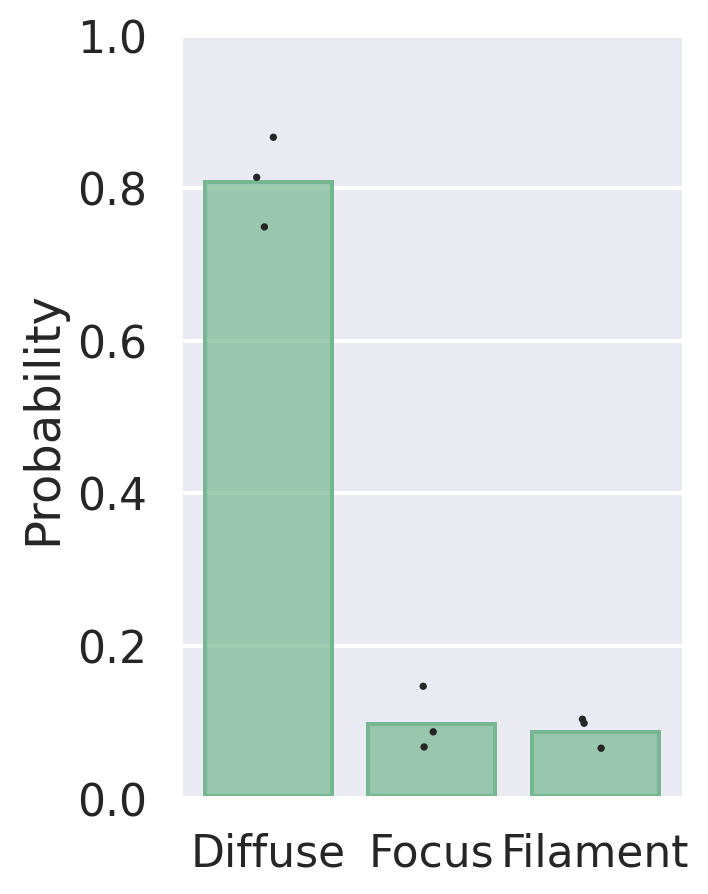

In [14]:
import seaborn.objects as so
import seaborn as sns

color = sns.color_palette('crest', 5)[0]

(
    so.Plot(hist, x='ClassIdx', y='proportion')
    .layout(size=(4,5))
    .add(so.Bar(color=color), so.Agg(), legend=False)
    .add(so.Dots(color='k', fillalpha=1, marker='.'), so.Jitter(), legend=False)
    .limit(x=(None, None), y=(0, 1))
    .label(x="", y="Probability", color='', title='')
    .theme(sns.plotting_context("talk"))
    .save(loc='/media/daniel/HDD Daniel/DanielThedie/Figures/RecB_article_figures/1_Endogenous/RecA_structures.svg', format='svg', bbox_inches='tight')
)